<a href="https://colab.research.google.com/github/lucabarattini/STAT-5703/blob/main/STAT_5703_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- SIMULATION SETUP ---
True Theta: 1.0
Sample Size (n): 200
Number of Simulations: 10000
------------------------------

[Step 1] Data Generation
Data Shape: (10000, 200) (Rows=Experiments, Cols=Observations)
Sample from Experiment 1 (first 5 obs): [0.27609503 0.53723819 0.68673626 0.14994966 0.35131331]

[Step 2] Compute Maximums (M_n)
Max of Exp 1: 0.996256 (Should be close to 1.0)
Max of Exp 2: 0.999397
Avg of all M_n: 0.994983 (Biased, slightly less than 1.0)

[Step 3] Compute Scaled Error n(theta - M_n)
Statistic for Exp 1: 200 * (1.0 - 0.996256) = 0.7488
Avg of Statistic: 1.0034 (Should be close to 1/theta = 1.0)

[Step 4] Plotting Histogram...


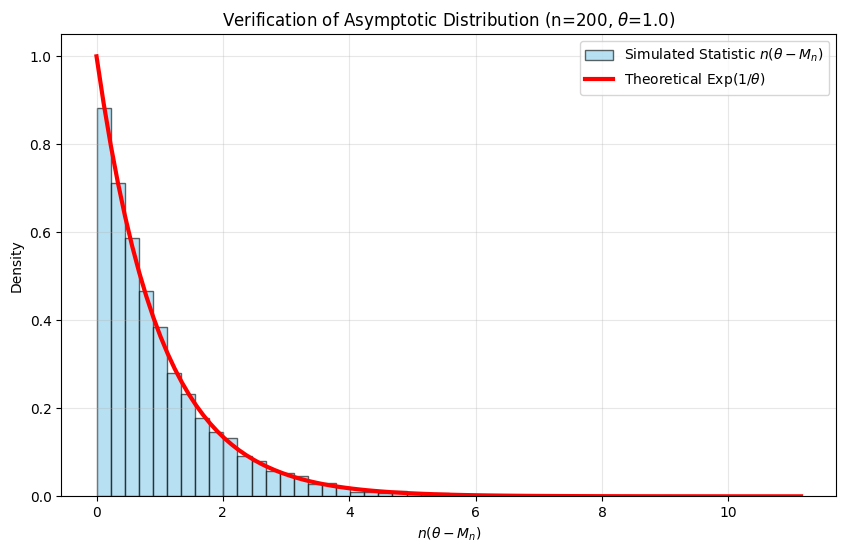

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# 1. Setup Parameters
THETA = 1.0       # The true parameter we want to estimate
n = 200           # Sample size (number of observations per experiment)
N_SIMS = 10000    # Number of experiments to run

print(f"--- SIMULATION SETUP ---")
print(f"True Theta: {THETA}")
print(f"Sample Size (n): {n}")
print(f"Number of Simulations: {N_SIMS}")
print("-" * 30)

# 2. Generate Data
data = np.random.uniform(0, THETA, (N_SIMS, n))

print(f"\n[Step 1] Data Generation")
print(f"Data Shape: {data.shape} (Rows=Experiments, Cols=Observations)")
print(f"Sample from Experiment 1 (first 5 obs): {data[0, :5]}")

# 3. Compute Estimator M_n (Max of each sample)
M_n = np.max(data, axis=1)

print(f"\n[Step 2] Compute Maximums (M_n)")
print(f"Max of Exp 1: {M_n[0]:.6f} (Should be close to {THETA})")
print(f"Max of Exp 2: {M_n[1]:.6f}")
print(f"Avg of all M_n: {np.mean(M_n):.6f} (Biased, slightly less than {THETA})")

# 4. Compute the Statistic n(theta - M_n)
statistic = n * (THETA - M_n)

print(f"\n[Step 3] Compute Scaled Error n(theta - M_n)")
print(f"Statistic for Exp 1: {n} * ({THETA} - {M_n[0]:.6f}) = {statistic[0]:.4f}")
print(f"Avg of Statistic: {np.mean(statistic):.4f} (Should be close to 1/theta = {1.0})")

# 5. Plotting
print(f"\n[Step 4] Plotting Histogram...")
plt.figure(figsize=(10, 6))

# Histogram of simulated values
plt.hist(statistic, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Simulated Statistic $n(\\theta - M_n)$')

# Theoretical Curve: Exp(1/theta)
x_vals = np.linspace(0, np.max(statistic), 100)
pdf_vals = (1/THETA) * np.exp(-(1/THETA) * x_vals)

plt.plot(x_vals, pdf_vals, 'r-', linewidth=3, label=f'Theoretical Exp(1/$\\theta$)')

plt.title(f'Verification of Asymptotic Distribution (n={n}, $\\theta$={THETA})')
plt.xlabel('$n(\\theta - M_n)$')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()